In [65]:
# Build a machine learning model to predict user will click the ad or not 
import pandas as pd
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import *
from sklearn.metrics import confusion_matrix


import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.metrics import *
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
import importlib.util

import pickle
import seaborn as sns

In [66]:
spec = importlib.util.spec_from_file_location("DataPreprocessing", "/home/admin1/PycharmProjects/Machine_learning_Python/Utility/DataPreprocessing.py")
#At home windows
# spec = importlib.util.spec_from_file_location("DataPreprocessing", "C:/Users/PRAYAS/PycharmProjects/Machine_Learning_Python/Utility/DataPreprocessing.py")
# C:\Users\PRAYAS\PycharmProjects\Machine_Learning_Python\Utility
foo = importlib.util.module_from_spec(spec)
spec.loader.exec_module(foo)
preprocess_obj = foo.DataPreprocessing()

Data PreProcessign object created successfully


In [67]:
dataframe = pd.read_csv('Data/Social_Network_Ads.csv')

In [68]:
dataframe.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [69]:
(dataframe==np.NaN).sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

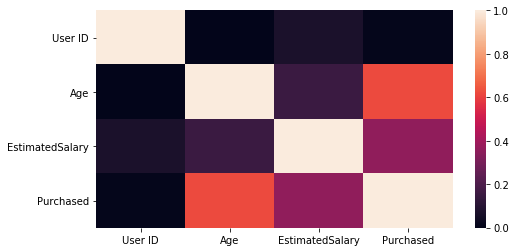

In [70]:
fig, ax = plt.subplots(figsize=(8,4))
sns.heatmap(dataframe.corr())
# df.corr() Gives correlation matrix
# here it shows the correlation by color mentioned on right side

In [71]:
dataframe= dataframe.drop('User ID',axis=1)

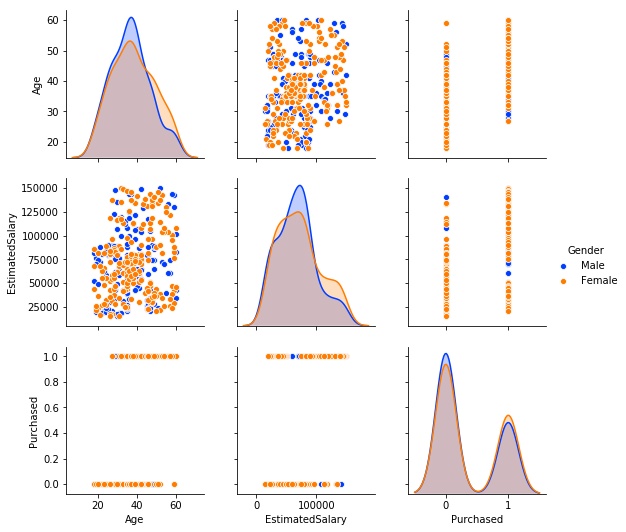

In [72]:
sns.pairplot(dataframe,hue='Gender',palette='bright')

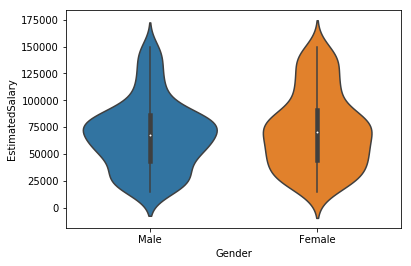

In [73]:
sns.violinplot(x='Gender',y='EstimatedSalary',data=dataframe)
# shows us the distribution of data here we're checkign the salary of each gender

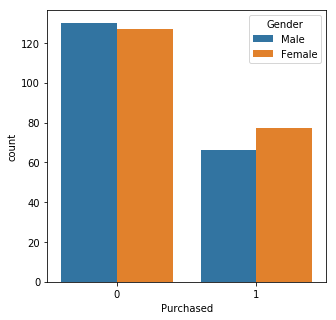

In [74]:
plt.figure(figsize=(5,5))
sns.countplot(x='Purchased',data=dataframe,hue='Gender')
# Here we'll see the count of  males who have purchased and who have not

In [75]:
sns.countplot(ax=ax,x='Age',data=dataframe,hue='Purchased')
# it shows that at what age averagely 

In [76]:
(dataframe==np.NaN).sum()

Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [77]:
(dataframe.Age==0).sum()

0

In [78]:
ss = StandardScaler()

In [79]:
Y_train = dataframe['Purchased']
dataframe = dataframe.drop('Purchased',axis=1)

In [80]:
dataframe.head()

,Gender,Age,EstimatedSalary
0,Male,19,19000
1,Male,35,20000
2,Female,26,43000
3,Female,27,57000
4,Male,19,76000


In [81]:
le=LabelEncoder()
dataframe['Gender'] = (pd.DataFrame(dataframe['Gender'])).apply(le.fit_transform)

In [82]:
for item in range(1,dataframe.shape[1]):
    dataframe.iloc[:,item] = ss.fit_transform((dataframe.iloc[:,item].values).reshape(-1,1))

/home/admin1/anaconda3/envs/prayas_env/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/admin1/anaconda3/envs/prayas_env/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/admin1/anaconda3/envs/prayas_env/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/admin1/anaconda3/envs/prayas_env/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [83]:
dataframe.head()

,Gender,Age,EstimatedSalary
0,1,-1.781797,-1.490046
1,1,-0.253587,-1.460681
2,0,-1.113206,-0.785290
3,0,-1.017692,-0.374182
4,1,-1.781797,0.183751


In [84]:
class Naive_Bayes_sklearn():
        
    def Naive_Bayes_sklearn_demo(self,X_train,Y_train,X_test,Y_test):
        classifier = GaussianNB()
        classifier.fit(X_train,Y_train)
        file = open('NaiveBayes_P1.pkl','wb')
        pickle.dump(classifier,file)
        file.close()
        Ypred = classifier.predict(X_test)
        cmat = confusion_matrix(Y_test,Ypred)
        print("Accuracy by accuracy score is = {}\nThe confusion matrix is: \n{}".format(accuracy_score(Ypred,Y_test)*100,cmat))
        return classifier
    
    def plotter(self,X_train,Y_train,classifier,title):
        X1_grid, X2_grid = np.meshgrid(np.arange(start=X_train.iloc[:,0].min()-1,stop=X_train.iloc[:,0].max()+1,step=0.01),
                                       np.arange(start=X_train.iloc[:,1].min()-1,stop=X_train.iloc[:,1].max()+1,step=0.01))
                                      
        plt.figure(figsize=(10,6))
        plt.contourf(X1_grid,X2_grid,classifier.predict(np.array([X1_grid.ravel(),X2_grid.ravel()]).T).reshape(X1_grid.shape)
                     ,alpha=0.75, cmap = ListedColormap(('#ff2a16','#35ff16'))
                    )
        plt.title(title)
        plt.xlim(X1_grid.min(),X1_grid.max())
        plt.ylim(X2_grid.min(),X2_grid.max())
        for i,j in enumerate(np.unique(Y_train)):
            plt.scatter(X_train.values[Y_train[:]==j,0],X_train.values[Y_train[:]==j,1],
                        c = ListedColormap(('red','green'))(i),label=j)
        
    def main(self,dataframe,Y_train):
        X_train = dataframe[['Age','EstimatedSalary']]
        X_train,X_test,Y_train,Y_test = train_test_split(X_train,Y_train,test_size = 0.3)
        classifier = self.Naive_Bayes_sklearn_demo(X_train,Y_train,X_test,Y_test)
        self.plotter(X_train,Y_train,classifier,"train data vs separator")
        self.plotter(X_test,Y_test,classifier,"Test data vs separator")

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

Accuracy by accuracy score is = 86.66666666666667
The confusion matrix is: 
[[70  9]
 [ 7 34]]


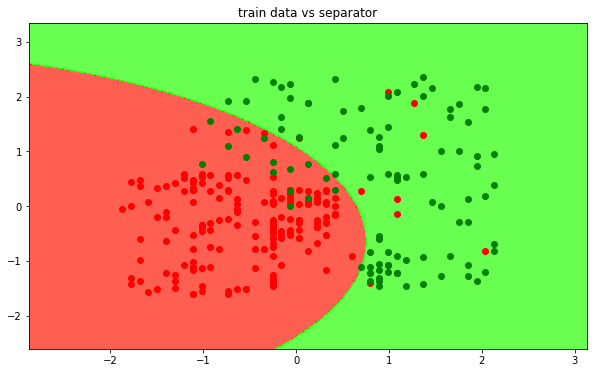

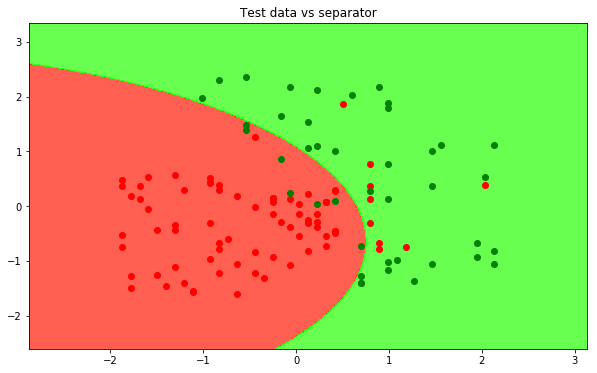

In [85]:
classifier = Naive_Bayes_sklearn()
classifier.main(dataframe,Y_train)